In [3]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [35]:
def load_photos(directory):
    images = []
    labels = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = name.split('_')[0]
        if value == '0':
            value = 0
        elif value == '1':
            value = 1
        labels.append(value)
        images.append(image)
    return images, labels

In [36]:
# load images from both train and test groups
directory = '../data/Dataset-tg-1-anticipation/Train'
images, labels = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../data/Dataset-tg-1-anticipation/Val'
images_val, labels_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 165
Loaded Images and labels for validation: 23


In [37]:
#normalise datas
images = np.array(images)
images = images[:, 40:58, :, :]
images /= 255
images_val = np.array(images_val)
images_val = images_val[:, 40:58, :, :]
images_val /= 255

((165, 18, 160, 3), <matplotlib.image.AxesImage at 0x200ee7792e8>)

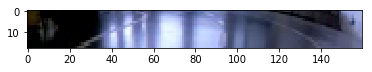

In [21]:
images.shape, plt.imshow(images[104])

In [8]:
#convert labels to np.array
labels = np.array(labels)
labels_val = np.array(labels_val)

In [9]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)

In [10]:
labelsd.shape, labelsd

((165, 2),      0  1
 0    1  0
 1    1  0
 2    1  0
 3    1  0
 4    1  0
 5    1  0
 6    1  0
 7    1  0
 8    1  0
 9    1  0
 10   1  0
 11   1  0
 12   1  0
 13   1  0
 14   1  0
 15   1  0
 16   1  0
 17   1  0
 18   1  0
 19   1  0
 20   1  0
 21   1  0
 22   1  0
 23   1  0
 24   1  0
 25   1  0
 26   1  0
 27   1  0
 28   1  0
 29   1  0
 ..  .. ..
 135  0  1
 136  0  1
 137  0  1
 138  0  1
 139  0  1
 140  0  1
 141  0  1
 142  0  1
 143  0  1
 144  0  1
 145  0  1
 146  0  1
 147  0  1
 148  0  1
 149  0  1
 150  0  1
 151  0  1
 152  0  1
 153  0  1
 154  0  1
 155  0  1
 156  0  1
 157  0  1
 158  0  1
 159  0  1
 160  0  1
 161  0  1
 162  0  1
 163  0  1
 164  0  1
 
 [165 rows x 2 columns])

In [11]:
#convert to np.array again
labelsd = np.array(labelsd)

In [38]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [39]:
#from keras.models import load_model
#model = load_model('model-anticipation.h5')

In [26]:
K.clear_session()

img_in = Input(shape=(18, 160, 3), name='img_in')

x = img_in

x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

flat = Flatten()(x)

x = Dense(20)(flat)
x = Activation('relu')(x)

#categorical output
out = Dense(2, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 18, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 160, 1)        28        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 80, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 80, 2)          20        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 40, 2)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 40, 2)          38        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 20, 2)          0         
__________

In [43]:
h = model.fit(images, labelsd, batch_size=1, epochs=15, verbose=1)

Epoch 1/15
165/165 [==============================] - 0s - loss: 0.1078 - acc: 0.9636     
Epoch 2/15
165/165 [==============================] - 0s - loss: 0.0959 - acc: 0.9697     
Epoch 3/15
165/165 [==============================] - 0s - loss: 0.0950 - acc: 0.9576     
Epoch 4/15
165/165 [==============================] - 0s - loss: 0.0811 - acc: 0.9697     
Epoch 5/15
165/165 [==============================] - 0s - loss: 0.0641 - acc: 0.9818     
Epoch 6/15
165/165 [==============================] - 0s - loss: 0.0702 - acc: 0.9758     
Epoch 7/15
165/165 [==============================] - 0s - loss: 0.0556 - acc: 0.9818     
Epoch 8/15
165/165 [==============================] - 0s - loss: 0.0587 - acc: 0.9818     
Epoch 9/15
165/165 [==============================] - 0s - loss: 0.0394 - acc: 1.0000     
Epoch 10/15
165/165 [==============================] - 0s - loss: 0.0342 - acc: 0.9879     
Epoch 11/15
165/165 [==============================] - 0s - loss: 0.0354 - acc: 0.9879   

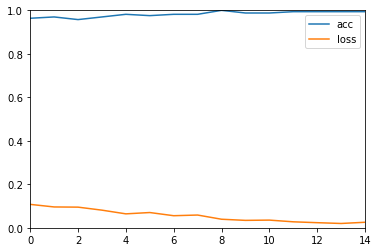

In [44]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [45]:
# Get predictions
all_preds = np.argmax(model.predict(images_val), axis=1)

all_preds, labels_val

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64),
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
import math
i = 0
res = 0
for value in all_preds:
    if value != labels_val[i]:
        res = res + 1
    i = i + 1
res/i

0.21739130434782608

In [47]:
model.save('model-1x3+tg-anticipation.h5')

In [41]:
from keras.models import load_model
model = load_model('test_model.h5')

OSError: Unable to open file (Unable to open file: name = 'test_model.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)